R^2 overall: 0.8177069677799003
Drug 1 R² within-drug: 0.0
Drug 2 R² within-drug: 0.0
Mean R² within drugs: 0.0


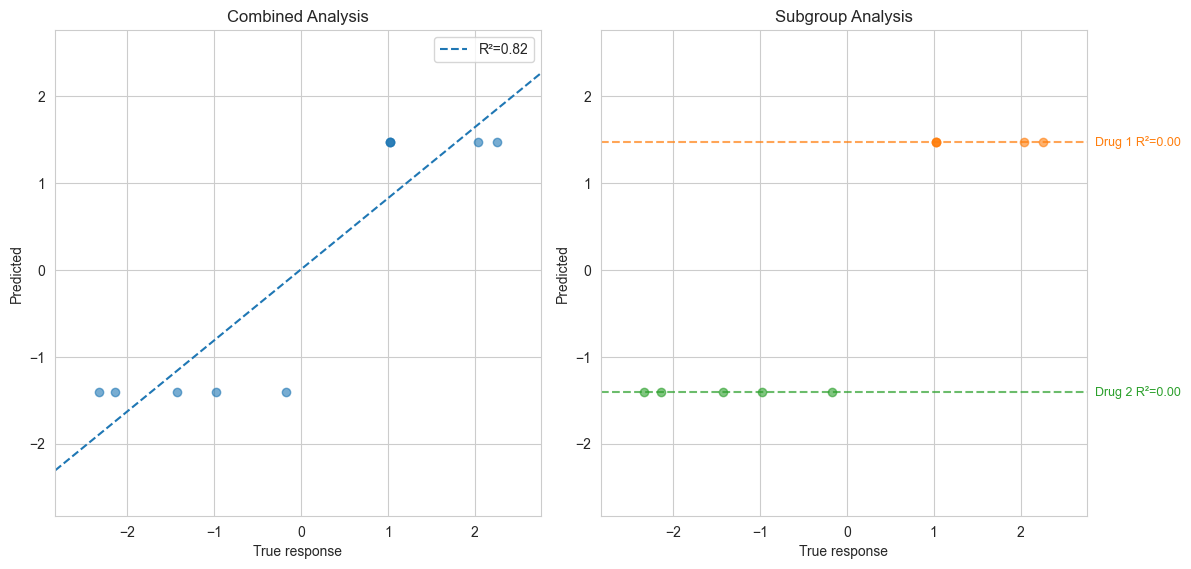

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Parameters
n_drugs = 2
n_cells = 5
drug_sd = 3.0
cell_sd = 0.0
noise_sd = 1.0

# Generate effects
drug_effects = np.random.normal(0, drug_sd, n_drugs)
cell_effects = np.random.normal(0, cell_sd, n_cells)

# Response matrix
responses = drug_effects[:, None] + cell_effects[None, :] + np.random.normal(0, noise_sd, (n_drugs, n_cells))

# Naive model: predict drug mean + small fraction of cell line effect
pred_naive = np.mean(responses, axis=1, keepdims=True)
cell_fraction = 0.2
pred_naive_full = pred_naive + cell_fraction * (cell_effects - np.mean(cell_effects))[None, :]

# Compute R^2
r2_overall = r2_score(responses.flatten(), pred_naive_full.flatten())
within_r2 = [r2_score(responses[i, :], pred_naive_full[i, :]) for i in range(n_drugs)]
mean_within_r2 = np.mean(within_r2)

print("R^2 overall:", r2_overall)
for i, r2 in enumerate(within_r2):
    print(f"Drug {i+1} R² within-drug:", r2)
print("Mean R² within drugs:", mean_within_r2)

# Determine global min/max for full visibility
vmin = min(responses.min(), pred_naive_full.min()) - 0.5
vmax = max(responses.max(), pred_naive_full.max()) + 0.5
x_vals = np.array([vmin, vmax])

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall scatter with regression line in same color
color_overall = 'C0'
axs[0].scatter(responses.flatten(), pred_naive_full.flatten(), alpha=0.6, color=color_overall)
reg_all = LinearRegression().fit(responses.flatten()[:, None], pred_naive_full.flatten())
y_vals = reg_all.predict(x_vals[:, None])
axs[0].plot(x_vals, y_vals, color=color_overall, linestyle='--', label=f'R²={r2_overall:.2f}')
axs[0].set_xlabel("True response")
axs[0].set_ylabel("Predicted")
axs[0].set_title("Combined Analysis")
axs[0].legend()
axs[0].set_aspect('equal', adjustable='box')
axs[0].set_xlim(vmin, vmax)
axs[0].set_ylim(vmin, vmax)

# Within-drug scatter with regression lines and R² on the lines
colors = plt.cm.tab10(np.arange(n_drugs)+1)
for i in range(n_drugs):
    axs[1].scatter(responses[i, :], pred_naive_full[i, :], alpha=0.6, color=colors[i])
    reg = LinearRegression().fit(responses[i, :][:, None], pred_naive_full[i, :])
    y_line = reg.predict(x_vals[:, None])
    axs[1].plot(x_vals, y_line, color=colors[i], linestyle='--', alpha=0.7)
    # Place R² label near the end of the regression line
    axs[1].text(x_vals[1]+0.1, y_line[1], f'Drug {i+1} R²={within_r2[i]:.2f}', color=colors[i], fontsize=9, va='center')

axs[1].set_xlabel("True response")
axs[1].set_ylabel("Predicted")
axs[1].set_title("Subgroup Analysis")
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_xlim(vmin, vmax)
axs[1].set_ylim(vmin, vmax)
plt.savefig("simpsons_analysis.png", dpi=320)

plt.tight_layout()
plt.show()
